In [1]:
import numpy as np
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
from  matplotlib import pyplot as plt
from adjustText import adjust_text

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [4]:
path_1 = '/drive/MyDrive/colab_stuff/word2vec/word2vec_100_3_polish.bin'
model_1 = KeyedVectors.load(path_1)

In [17]:
model_1 = None
path_2 = '/drive/MyDrive/colab_stuff/word2vec/word2vec_300_3_polish.bin'
model_2 = KeyedVectors.load(path_2)

# Zadanie 3 i 4

Znalezienie najbardziej podobnych słów i wypisanie 5

In [5]:
WORDS_TO_DISPLAY = 5

def find_most_similar_words(word, model):
  vec_representation = model[word]
  most_similar = model.similar_by_vector(vec_representation)[1 : WORDS_TO_DISPLAY + 1]
  return [word for word, score in most_similar]

In [6]:
words = [
  'kpk',
  'szkoda',
  'wypadek',
  'kolizja',
  'nieszczęście',
  'rozwód',
]

In [7]:
for word in words:
  print(f'\033[1m{word}\033[0m')
  print(f'   model_1: {find_most_similar_words(word, model_1)}')

kpk
   model_1: ['kilopond', 'kpzs', 'kpu', 'sownarkomu', 'wcik']
szkoda
   model_1: ['krzywda', 'pożytek', 'strata', 'ryzyko', 'uszczerbek']
wypadek
   model_1: ['przypadek', 'okoliczności', 'padku', 'incydent', 'zdarzenie']
kolizja
   model_1: ['zderzenie', 'awaria', 'kraksa', 'turbulencja', 'poślizg']
nieszczęście
   model_1: ['niebezpieczeństwo', 'cierpienia', 'strapienie', 'cierpienie', 'utrapienie']
rozwód
   model_1: ['małżeństwo', 'separacja', 'adopcja', 'ślub', 'unieważnienie']


In [18]:
for word in words:
  print(f'\033[1m{word}\033[0m')
  print(f'   model_2: {find_most_similar_words(word, model_2)}')

kpk
   model_2: ['ksh', 'cywilnego', 'postępowania', 'kilopond', 'kkkw']
szkoda
   model_2: ['uszczerbek', 'krzywda', 'strata', 'despekt', 'pożytek']
wypadek
   model_2: ['przypadek', 'okoliczności', 'padku', 'padki', 'incydent']
kolizja
   model_2: ['zderzenie', 'awaria', 'kraksa', 'turbulencja', 'poślizg']
nieszczęście
   model_2: ['utrapienie', 'cierpienia', 'niedola', 'strapienie', 'cierpienie']
rozwód
   model_2: ['separacja', 'małżeństwo', 'ślub', 'rozwodowy', 'unieważnienie']


# Zadanie 5 i 6

Znalezienie najbardziej podobnych do wyrażeń słów i wypisanie 7

In [8]:
WORDS_TO_DISPLAY_2 = 7

def find_most_similar_words_to_expression(expression, model):
  vec_representations = [model[word] for word in expression.split()]
  avg_representation = np.mean(vec_representations, axis=0)
  most_similar = model.similar_by_vector(avg_representation)[:WORDS_TO_DISPLAY_2]
  return [word for word, score in most_similar]

In [9]:
expressions = [
  'sąd najwyższy',
  'trybunał konstytucyjny',
  'szkoda majątkowy',
  'kodeks cywilny',
  'sąd rejonowy',
]

In [10]:
for expression in expressions:
  print(f'\033[1m{expression}\033[0m')
  print(f'   model_1: {find_most_similar_words_to_expression(expression, model_1)}')

sąd najwyższy
   model_1: ['sąd', 'trybunał', 'najwyższy', 'trybunat', 'sędzia', 'areopag', 'sprawiedliwość']
trybunał konstytucyjny
   model_1: ['trybunał', 'konstytucyjny', 'sąd', 'bunał', 'senat', 'bunału', 'trybunat']
szkoda majątkowy
   model_1: ['szkoda', 'majątkowy', 'krzywda', 'świadczenie', 'odszkodowanie', 'dochód', 'wydatek']
kodeks cywilny
   model_1: ['kodeks', 'cywilny', 'pasztunwali', 'deksu', 'teodozjańskim', 'pozakodeksowy', 'sądowo']
sąd rejonowy
   model_1: ['sąd', 'prokuratura', 'rejonowy', 'trybunał', 'sądowy', 'magistrat', 'prokurator']


In [19]:
for expression in expressions:
  print(f'\033[1m{expression}\033[0m')
  print(f'   model_2: {find_most_similar_words_to_expression(expression, model_2)}')

sąd najwyższy
   model_2: ['sąd', 'trybunał', 'najwyższy', 'sędzia', 'sądowy', 'trybunat', 'sprawiedliwość']
trybunał konstytucyjny
   model_2: ['trybunał', 'konstytucyjny', 'sąd', 'trybunat', 'senat', 'parlament', 'bunału']
szkoda majątkowy
   model_2: ['szkoda', 'majątkowy', 'uszczerbek', 'korzyść', 'krzywda', 'majątek', 'strata']
kodeks cywilny
   model_2: ['kodeks', 'cywilny', 'amiatyński', 'cywilnego', 'deksu', 'isps', 'jōei']
sąd rejonowy
   model_2: ['sąd', 'rejonowy', 'prokuratura', 'trybunał', 'sądowy', 'okręgowy', 'apelacyjny']


# Zadanie 7

Znajdywanie słów najlepiej oddających wyniki równań na wektorach reprezentujących słowa

In [11]:
WORDS_TO_DISPLAY_3 = 5

def find_most_similar_words_to_equation_result(equation, model):
  a, b, c = equation
  most_similar = model.most_similar(positive=[a, b], negative=[c], topn=WORDS_TO_DISPLAY_3)
  return [word for word, score in most_similar]

In [12]:
equations = [
  ('sąd', 'konstytucja', 'kpk'),
  ('pasażer', 'kobieta', 'mężczyzna'),
  ('pilot', 'kobieta', 'mężczyzna'),
  ('lekarz', 'kobieta', 'mężczyzna'),
  ('nauczycielka', 'mężczyzna', 'kobieta'),
  ('przedszkolanka', 'mężczyzna', 'kobieta'),
  ('samochód', 'rzeka', 'droga'),
]

In [13]:
for equation in equations:
  print(f'\033[1m{equation[0]} + {equation[1]} - {equation[2]}\033[0m')
  print(f'   model_1: {find_most_similar_words_to_equation_result(equation, model_1)}')

sąd + konstytucja - kpk
   model_1: ['trybunał', 'ustawa', 'elekcja', 'deklaracja', 'dekret']
pasażer + kobieta - mężczyzna
   model_1: ['pasażerka', 'stewardessa', 'stewardesa', 'taksówka', 'podróżny']
pilot + kobieta - mężczyzna
   model_1: ['nawigator', 'oblatywacz', 'lotnik', 'pilotka', 'awionetka']
lekarz + kobieta - mężczyzna
   model_1: ['lekarka', 'ginekolog', 'pediatra', 'psychiatra', 'położna']
nauczycielka + mężczyzna - kobieta
   model_1: ['uczennica', 'studentka', 'nauczyciel', 'wychowawczyni', 'koleżanka']
przedszkolanka + mężczyzna - kobieta
   model_1: ['stażysta', 'wychowawczyni', 'kreślarka', 'pielęgniarz', 'siedmiolatek']
samochód + rzeka - droga
   model_1: ['jeep', 'buick', 'dżip', 'ponton', 'landrower']


In [20]:
for equation in equations:
  print(f'\033[1m{equation[0]} + {equation[1]} - {equation[2]}\033[0m')
  print(f'   model_2: {find_most_similar_words_to_equation_result(equation, model_2)}')

sąd + konstytucja - kpk
   model_2: ['trybunał', 'senat', 'ustawa', 'dekret', 'władza']
pasażer + kobieta - mężczyzna
   model_2: ['pasażerka', 'stewardesa', 'stewardessa', 'podróżny', 'pasażerski']
pilot + kobieta - mężczyzna
   model_2: ['pilotka', 'lotnik', 'stewardesa', 'nawigator', 'oblatywacz']
lekarz + kobieta - mężczyzna
   model_2: ['lekarka', 'pielęgniarka', 'ginekolog', 'psychiatra', 'chirurg']
nauczycielka + mężczyzna - kobieta
   model_2: ['nauczyciel', 'wychowawczyni', 'uczennica', 'koleżanka', 'przedszkolanka']
przedszkolanka + mężczyzna - kobieta
   model_2: ['stażysta', 'pierwszoklasista', 'wychowawczyni', 'praktykant', 'pielęgniarz']
samochód + rzeka - droga
   model_2: ['dżip', 'jeep', 'auto', 'ciężarówka', 'wóz']


# Zadanie 8

tSNE 1000 losowych słów z zaznaczeniem konkretnych

In [14]:
highlighted_words = [
  'szkoda',
  'strata',
  'uszczerbek',
  'krzywda',
  'niesprawiedliwość',
  'nieszczęście',
  'kobieta',
  'mężczyzna',
  'pasażer',
  'pasażerka',
  'student',
  'studentka',
  'lekarz',
  'lekarka',
]

In [15]:
def plot_tsne(model, highlighted_words, random_words):
  random_words_vecs = [model[word] for word in random_words]
  highlighted_words_vecs = [model[word] for word in highlighted_words]
  all_words_vecs = random_words_vecs + highlighted_words_vecs
  transformed_words = TSNE(n_components=2).fit_transform(all_words_vecs)
  random_words_2d = transformed_words[:1000]
  highlighted_words_2d = transformed_words[1000:]

  plt.figure(figsize=(20, 15))
  plt.scatter(random_words_2d[:, 0], random_words_2d[:, 1], color='lightblue')
  plt.scatter(highlighted_words_2d[:, 0], highlighted_words_2d[:, 1], color='red')

  texts = []
  for i, word in enumerate(highlighted_words):
    texts.append(plt.text(highlighted_words_2d[i, 0], highlighted_words_2d[i, 1], word))
  adjust_text(texts)

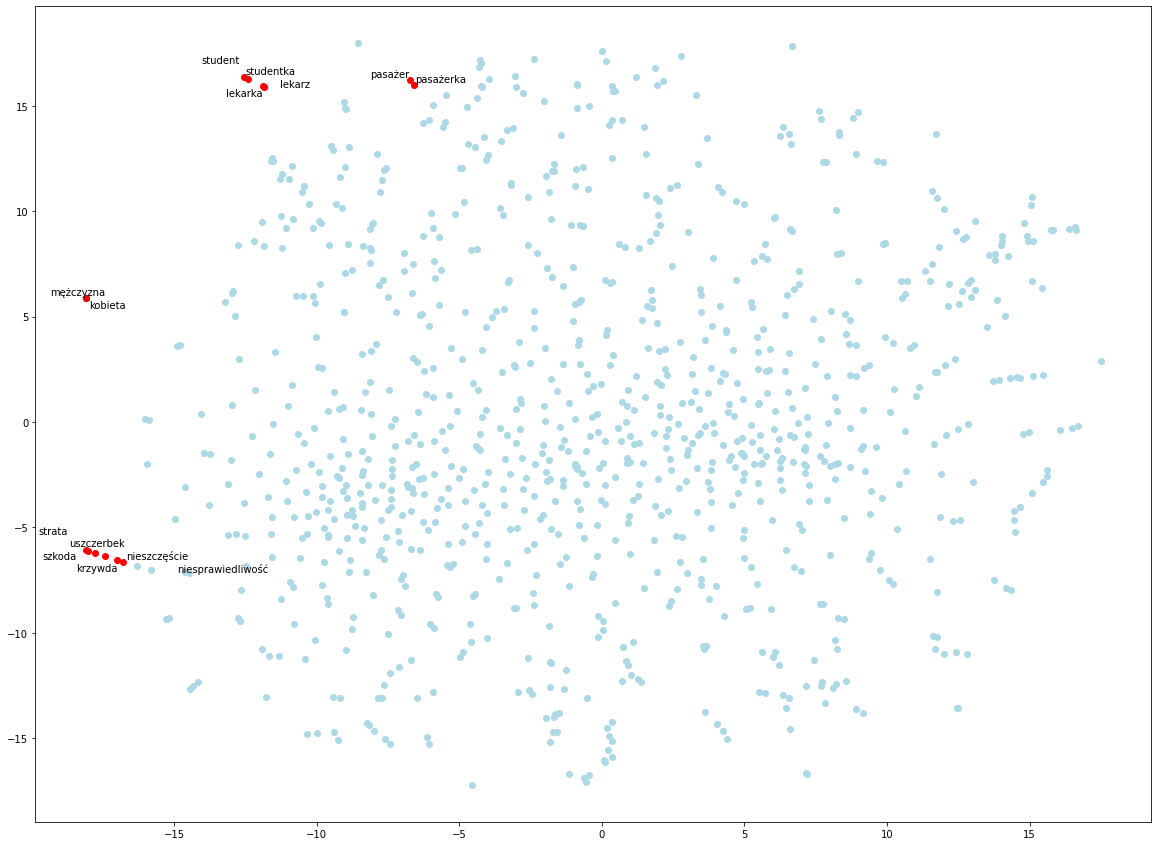

In [16]:
random_words_1 = np.random.choice(list(model_1.wv.vocab.keys()), 1000)
plot_tsne(model_1, highlighted_words, random_words_1)

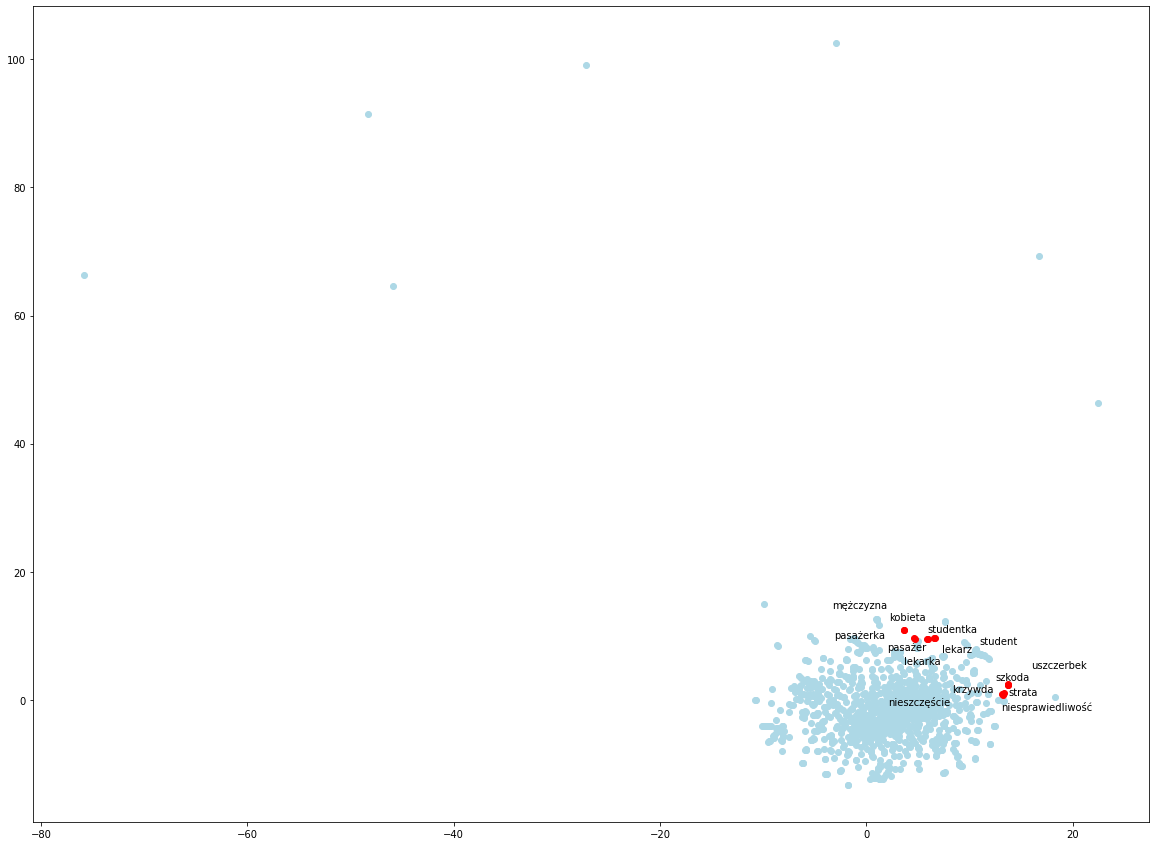

In [23]:
random_words_2 = np.random.choice(list(model_2.wv.vocab.keys()), 1000)
plot_tsne(model_2, highlighted_words, random_words_2)

Zadanie 9

1. Compare results for all experiments with respect to the employed models (100 300-d)?

W zadaniu znajdywania nabjardziej podobnych słów do podanych słów oba modele poradziły sobie nieźle. Większość znajdywanych słów to synonimy podanych na wejście słów, np. zderzenie, awaria kraksa dla słowa kolizja. Oba modele poradziły sobie praktycznie tak samo (jeden i drugi zwracał jedynie pojedyncze słowa będące antonimami np. pożytek dla słowa szkoda), większość zwracanych wyrazów pokrywała się dla obu modeli. W zadaniu, gdzie na wejściu otrzymywaliśmy wyrażenie i szukaliśmy słów najbardziej podobnych do średniej z wektorów reprezentacji obu słów znów oba modele poradziły sobie bardzo podobnie. Zwracane słowa odnosiły się czasami do pojedynczych słów z frazy (np. kodeks cywilny -> cywilny), a czasami do całej frazy (np. sąd rejonowy -> prokuratura). Model z 300-elementowymi wektorami zwrócił dziwne słowa 'deksu', 'isps', 'jōei' do kodeksu cywilnego, ale model 100-wymiarowy też zwrócił pojedyncze dziwne słowa ('bunał', 'bunału', 'deksu'). W eksperymencie z równaniami znów oba modele pozwoliły uzyskać podobne wyniki. Większości nieco lepiej poradził sobie model 300-wymiarowy (np. nauczycielka+mężczyzna-kobieta = nauczyciel, vs uczennica modelu 100-wymiarowego), ale czasami to model 100-wymiarowy zwracał bardziej oczekiwane rezultaty (w słowach zwróconych dla samochód + rzeka - droga był ponton)

2. Compare results for singe words and MWEs.

Wyniki dla pojedynczych słów były w zdecydowanej większości synonimami (np. szkoda -> krzywda, pożytek, strata...), a czasami antonimami (np. rozwód -> małżeństwo, ślub). Wyniki dla multiwordów większości odnosiły się od konkretnych słów tych wyrażeń (np. szkoda majątkowa -> majątkowy, krzywda), ale czasem były bardzo pokrewne do całego wyrażenia (szkoda majątkowa -> odszkodowanie, świadczenie).

3. How the results for MWEs could be improved?

Wyniki dla multiwordów mogą być poprawione przez np. inne łączenie reprezentacji wektorowych niż wyliczanie średniej, stosowanie innej odległości między wektorami (niż domyślnej cosinusowej). Można próbować np. włączania do reprezentacji wyrażenia w jakiś sposób ważonych reprezentacji najpodobniejszych słów (słów najbardziej podobnych do poszczególnych słów wyrażenia).

4. Are the results for albegraic operations biased?

W niektórych przypadkach tak (przedszkolanka + mężczyzna - kobieta = stażysta / pierwszoklasita / wychowawczyni...), ale prawdopodobnie jest to spowodowane brakiem męskiego odpowiednika słowa przedszkolanka. W innych przypadkach otrzymujemy takie formy słów których oczekujemy, więc ostatecznie myślę że nie można wyników nazwać stronniczymi/uprzedzonymi.

5. According to t-SNE: do representations of similar word cluster together?

Tak, lepiej to widać dla tsne na modelu 100-wymiarowym (przez to że nie ma tak dalekich outlierów, ale dla 300-wymiarowego jest tak samo). Bardzo blisko siebie lądują takie grupki słów jak (mężczyzna, kobieta) (student, studentka), (pasażer, pasażerka), (lekarz, lekarka), (strata, uszczerbek, szkoda, krzywda, nieszczęście, niesprawiedliwość)
